In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/EY 2025 DS Challenge'

/content/drive/MyDrive/Colab Notebooks/EY 2025 DS Challenge


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Load Data

In [4]:
sub_df = pd.read_csv('sub_s2.csv')
data_df = pd.read_csv('data_s2.csv')

In [5]:
display(sub_df)
display(data_df)

,Longitude,Latitude,UHI Index,Region,nearest_building_distance,building_density,avg_building_age,avg_building_elevation,avg_building_height,avg_height_above_ground,...,SB01,SB02,SB03,SB04,SB06,SB07,SB08,SB8A,SB11,SB12
0,-73.971665,40.788763,NaN,Manhattan,24.223804,9480,106.813675,72.826956,95.329320,22.502364,...,811.0,459.0,811.0,459.0,617.0,617.0,432.0,432.0,432.0,432.0
1,-73.971928,40.788875,NaN,Manhattan,18.437818,9425,106.924788,72.876599,95.641470,22.764872,...,1208.0,562.0,1208.0,562.0,731.0,731.0,647.0,647.0,647.0,647.0
2,-73.967080,40.789080,NaN,Manhattan,45.864314,10229,106.268013,70.930495,88.069186,17.138691,...,899.0,955.0,899.0,955.0,1052.0,1052.0,1188.0,1188.0,1188.0,1188.0
3,-73.972550,40.789082,NaN,Manhattan,4.973082,9363,107.083811,72.799308,96.101098,23.301791,...,1193.0,1132.0,1193.0,1132.0,1364.0,1364.0,1512.0,1512.0,1512.0,1512.0
4,-73.969697,40.787953,NaN,Manhattan,39.096254,9745,106.378912,72.361802,92.955090,20.593288,...,1097.0,1506.0,1097.0,1506.0,1642.0,1642.0,1688.0,1688.0,1688.0,1688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,-73.919388,40.813803,NaN,Bronx,27.991765,8911,76.912668,56.716524,41.501136,-15.215388,...,1474.0,1086.0,1474.0,1086.0,1382.0,1382.0,1474.0,1474.0,1474.0,1474.0
1036,-73.931033,40.833178,NaN,Bronx,25.217523,8922,91.454107,71.470845,52.338347,-19.132499,...,1014.0,548.0,1014.0,548.0,766.0,766.0,797.0,797.0,797.0,797.0
1037,-73.934647,40.854542,NaN,Manhattan,19.660984,5461,93.230841,98.281975,55.533750,-42.748225,...,917.0,1184.0,917.0,1184.0,1462.0,1462.0,1538.0,1538.0,1538.0,1538.0
1038,-73.917223,40.815413,NaN,Bronx,34.562437,9502,76.978893,57.478799,41.349281,-16.129518,...,1890.0,1066.0,1890.0,1066.0,1244.0,1244.0,1368.0,1368.0,1368.0,1368.0


,Longitude,Latitude,Datetime,UHI Index,Region,nearest_building_distance,building_density,avg_building_age,avg_building_elevation,avg_building_height,...,SB01,SB02,SB03,SB04,SB06,SB07,SB08,SB8A,SB11,SB12
0,-73.909167,40.813107,2021-07-24 15:53:00,1.030289,Bronx,28.702934,10957,76.409679,59.732250,39.734542,...,846.0,1042.0,846.0,1042.0,1036.0,1036.0,1036.0,1036.0,1036.0,1036.0
1,-73.909187,40.813045,2021-07-24 15:53:00,1.030289,Bronx,27.747556,10942,76.425754,59.670272,39.761382,...,846.0,1042.0,846.0,1042.0,1036.0,1036.0,1036.0,1036.0,1036.0,1036.0
2,-73.909215,40.812978,2021-07-24 15:53:00,1.023798,Bronx,26.465094,10923,76.404365,59.600471,39.763419,...,846.0,583.0,846.0,583.0,818.0,818.0,709.0,709.0,709.0,709.0
3,-73.909242,40.812908,2021-07-24 15:53:00,1.023798,Bronx,25.873093,10901,76.447440,59.550175,39.775245,...,846.0,581.0,846.0,581.0,733.0,733.0,657.0,657.0,657.0,657.0
4,-73.909257,40.812845,2021-07-24 15:53:00,1.021634,Bronx,26.359730,10883,76.461466,59.513618,39.775971,...,846.0,655.0,846.0,655.0,744.0,744.0,745.0,745.0,745.0,745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11224,-73.957050,40.790333,2021-07-24 15:57:00,0.972470,Manhattan,161.437295,12349,101.955419,58.208364,73.181264,...,481.0,473.0,481.0,473.0,708.0,708.0,528.0,528.0,528.0,528.0
11225,-73.957063,40.790308,2021-07-24 15:57:00,0.972470,Manhattan,161.166533,12344,101.963042,58.221419,73.191028,...,481.0,540.0,481.0,540.0,742.0,742.0,610.0,610.0,610.0,610.0
11226,-73.957093,40.790270,2021-07-24 15:57:00,0.981124,Manhattan,161.138005,12335,101.964168,58.224196,73.228970,...,481.0,540.0,481.0,540.0,742.0,742.0,610.0,610.0,610.0,610.0
11227,-73.957112,40.790253,2021-07-24 15:59:00,0.981245,Manhattan,161.353627,12336,101.966226,58.248520,73.240985,...,481.0,540.0,481.0,540.0,742.0,742.0,610.0,610.0,610.0,610.0


In [6]:
sub_df.columns

Index(['Longitude', 'Latitude', 'UHI Index', 'Region',
       'nearest_building_distance', 'building_density', 'avg_building_age',
       'avg_building_elevation', 'avg_building_height',
       'avg_height_above_ground', 'Datetime', 'Air Temp at Surface',
       'Relative Humidity', 'Avg Wind Speed', 'Wind Direction', 'Solar Flux',
       'SB01', 'SB02', 'SB03', 'SB04', 'SB06', 'SB07', 'SB08', 'SB8A', 'SB11',
       'SB12'],
      dtype='object')

# Data Exploration

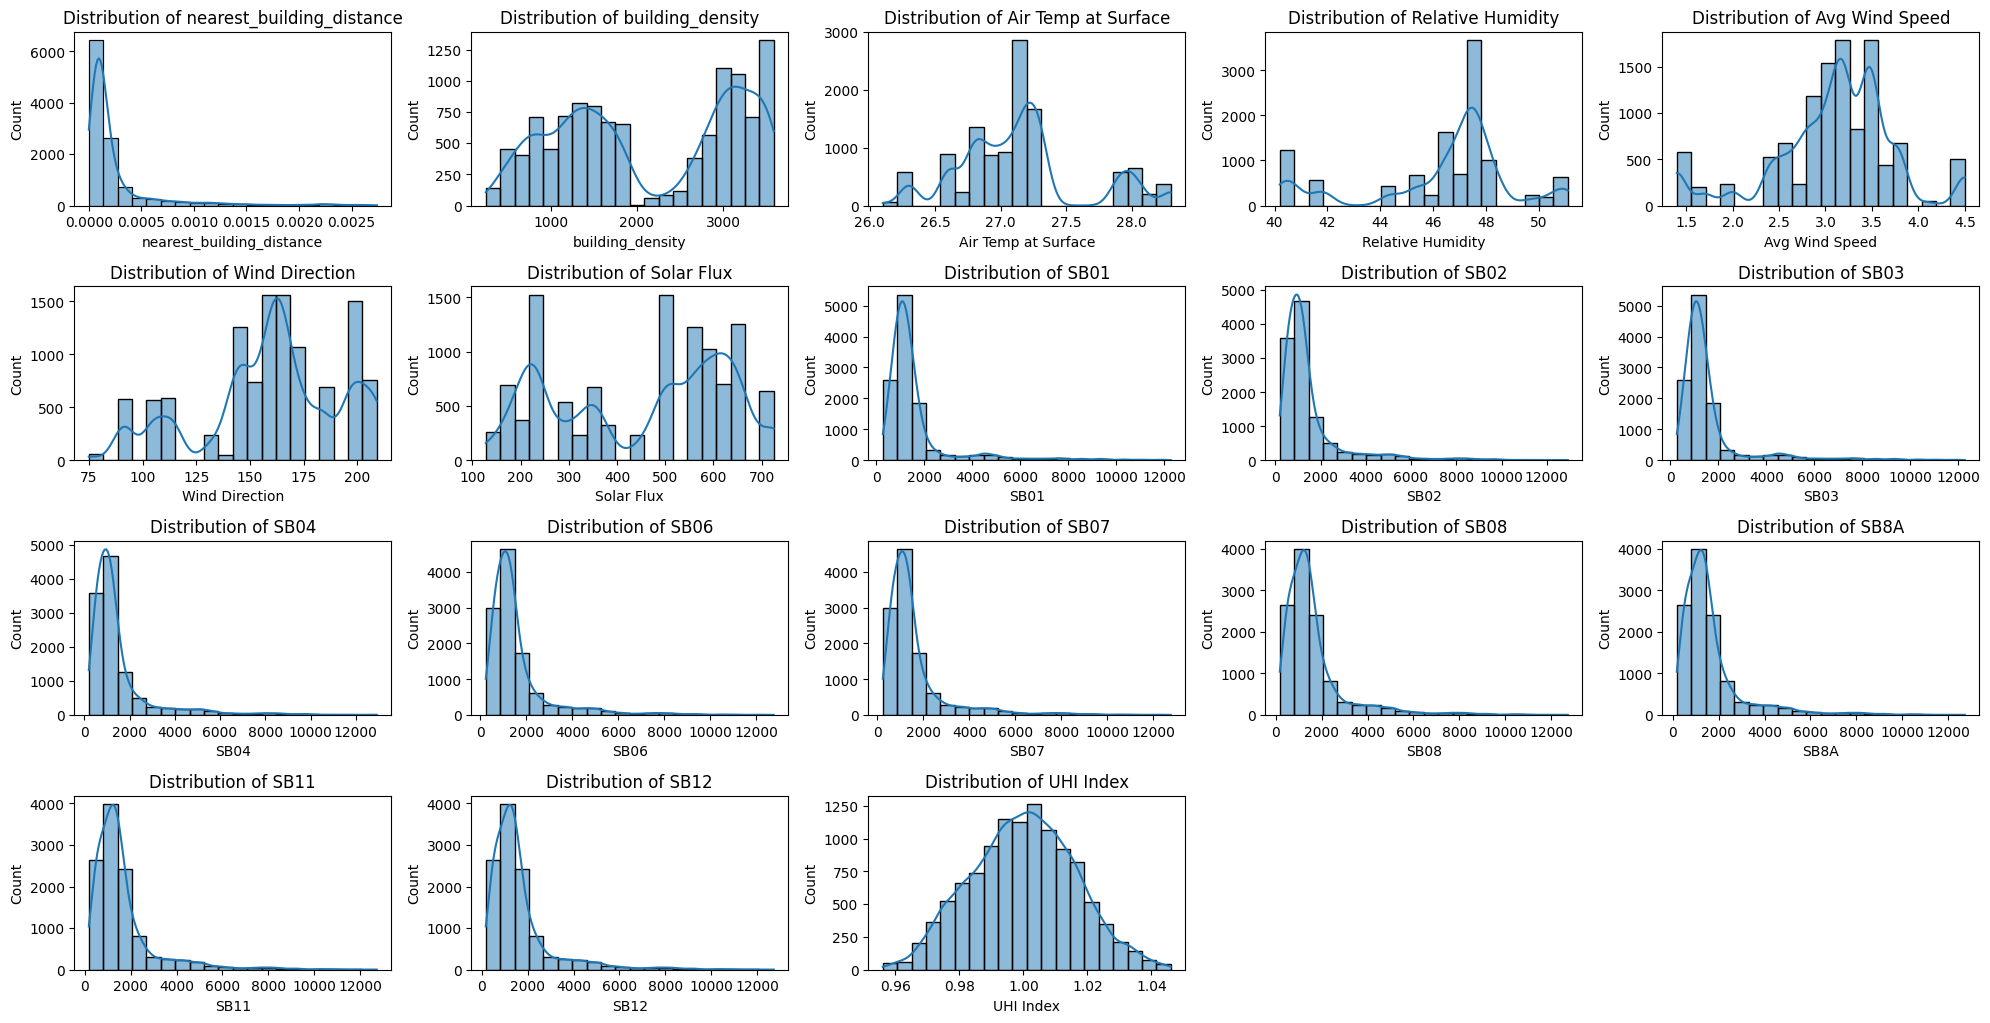

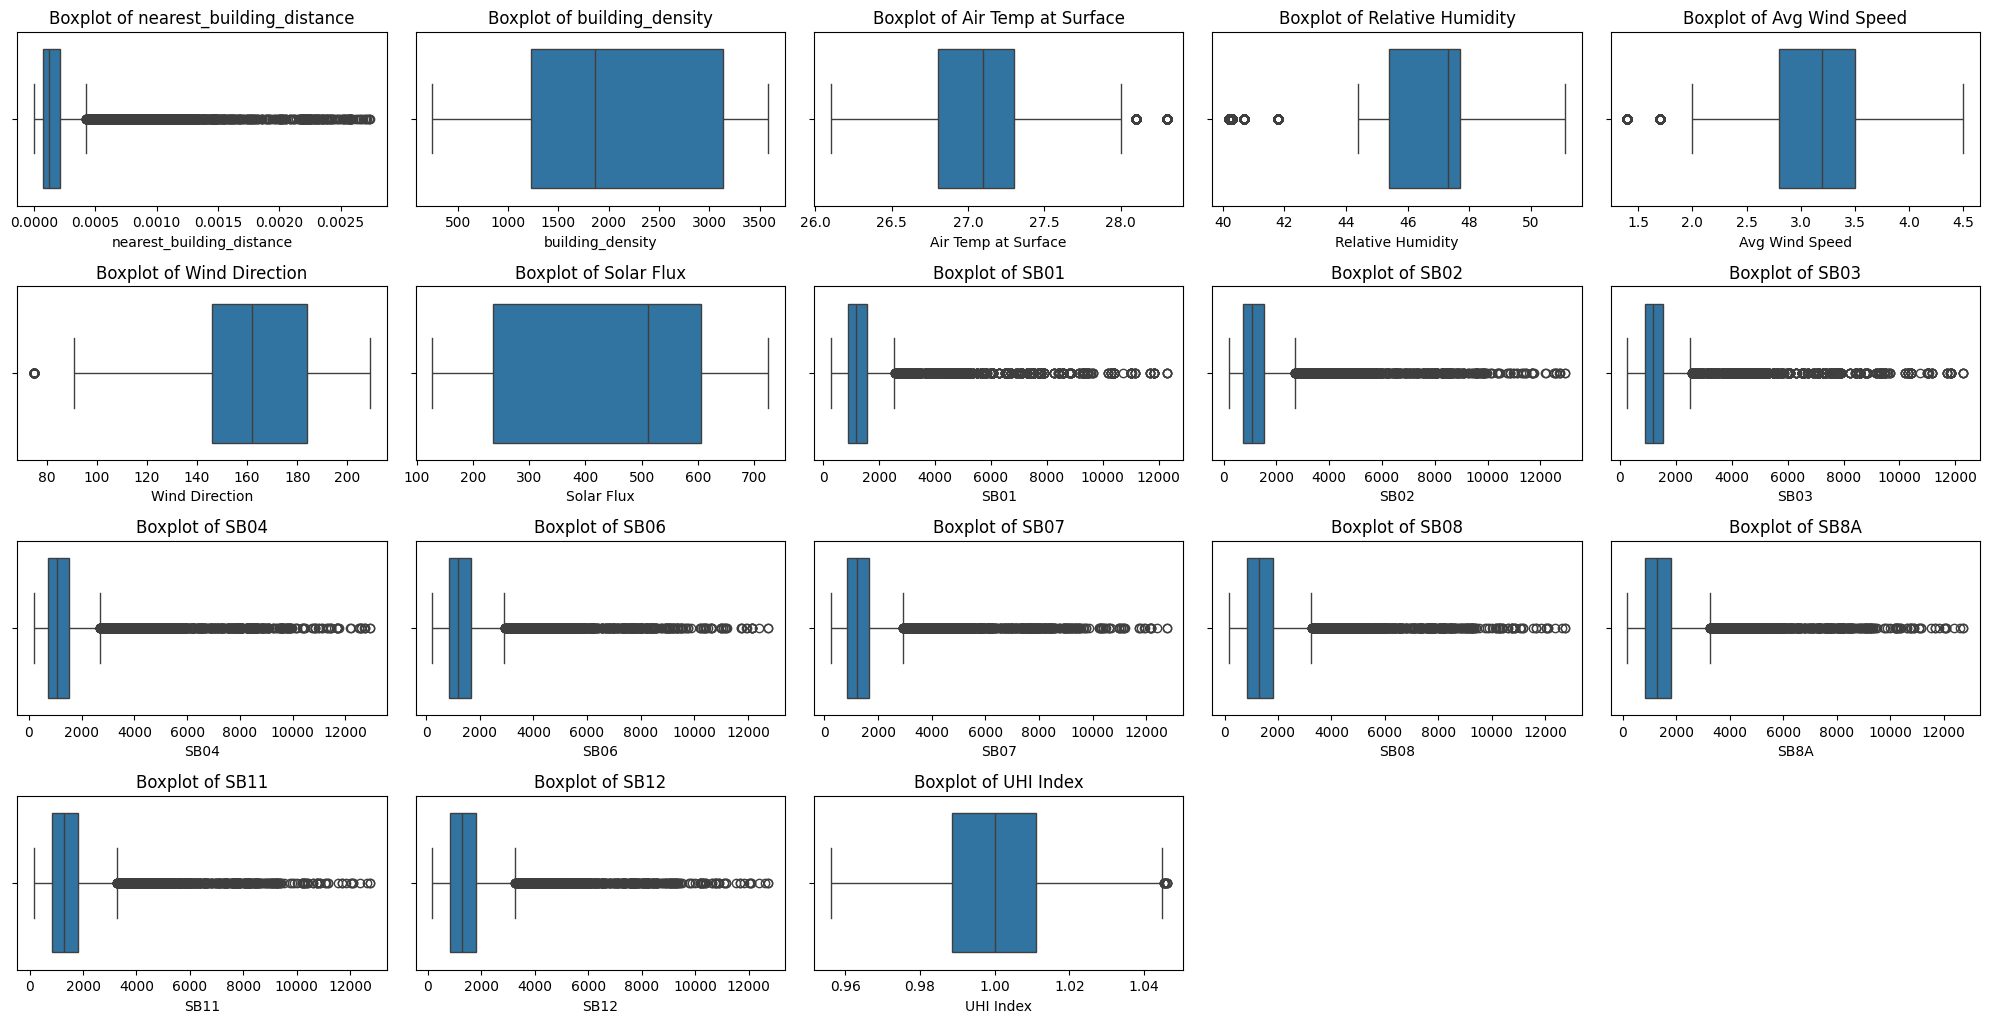

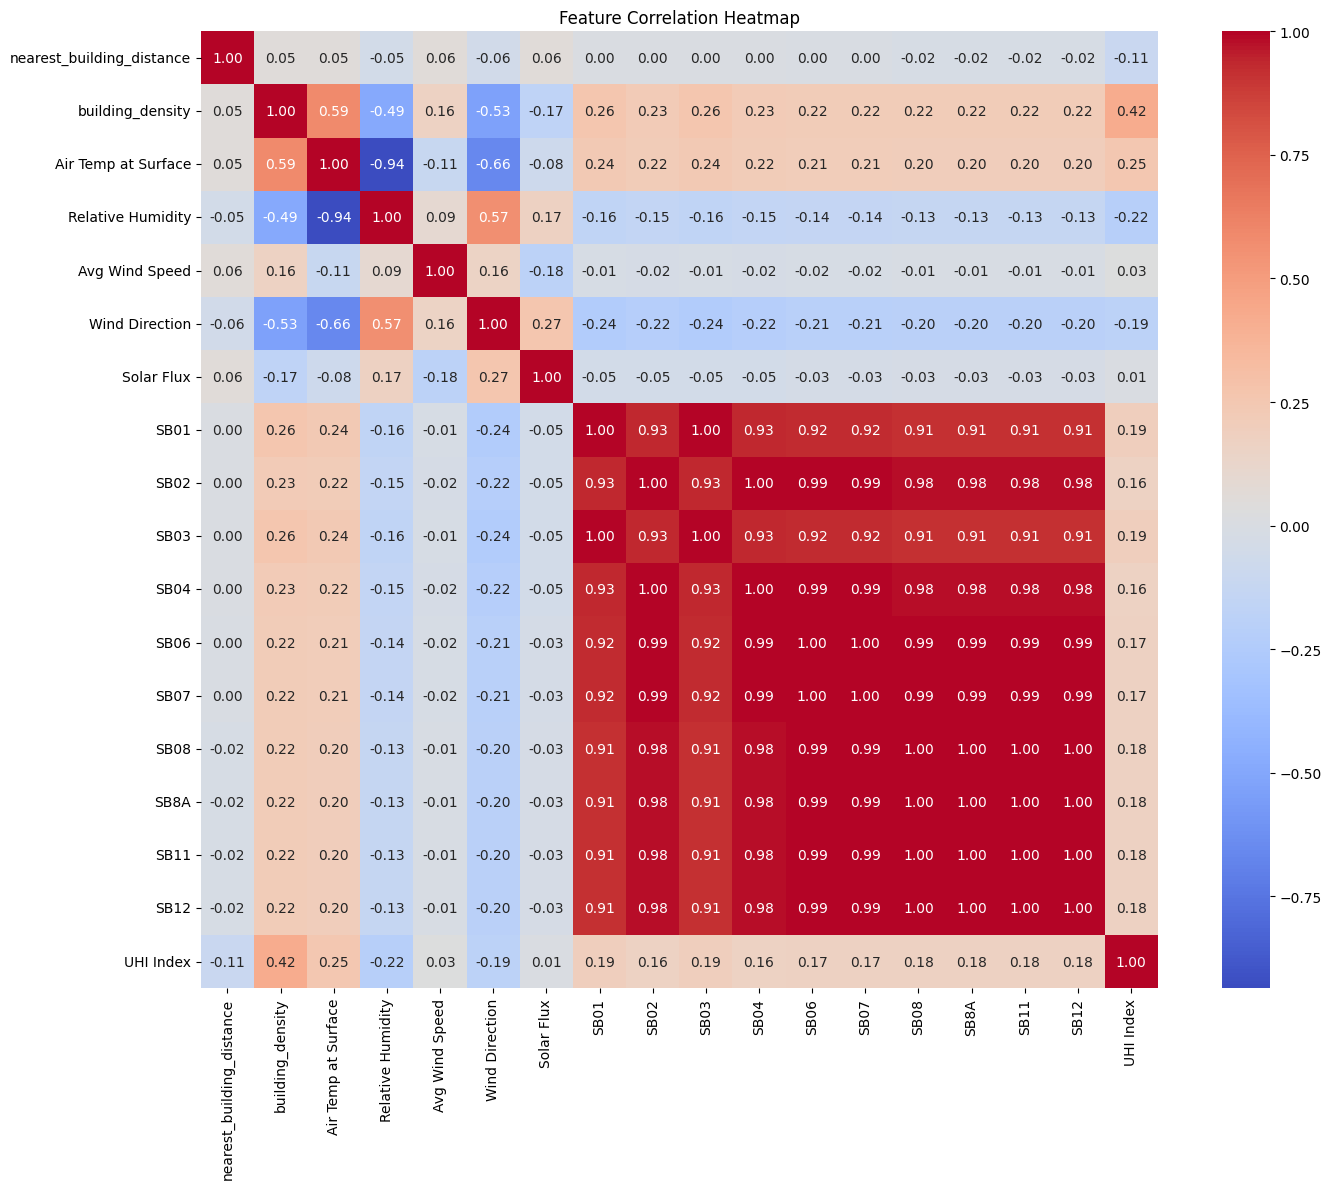

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

explore = [
    'nearest_building_distance', 'building_density', 'Air Temp at Surface',
    'Relative Humidity', 'Avg Wind Speed', 'Wind Direction', 'Solar Flux',
    'SB01', 'SB02', 'SB03', 'SB04', 'SB06', 'SB07', 'SB08', 'SB8A', 'SB11', 'SB12', 'UHI Index'
]

# Plotting histograms for all features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(explore):
    plt.subplot(6, 5, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(data_df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

# Plotting boxplots for all features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(explore):
    plt.subplot(6, 5, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.boxplot(x=data_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data_df[explore].corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()



# Feature Engineer

In [10]:
def calculate_spectral_indices(df):
    """
    Computes NDVI, NDBI, NDWI, SAVI, and MNDWI using Sentinel-2 bands.
    """
    df['NDVI'] = (df['SB08'] - df['SB04']) / (df['SB08'] + df['SB04'] + 1e-10)
    df['NDBI'] = (df['SB11'] - df['SB08']) / (df['SB11'] + df['SB08'] + 1e-10)
    df['NDWI'] = (df['SB03'] - df['SB08']) / (df['SB03'] + df['SB08'] + 1e-10)
    df['SAVI'] = ((df['SB08'] - df['SB04']) * 1.5) / (df['SB08'] + df['SB04'] + 0.5 + 1e-10)
    df['MNDWI'] = (df['SB03'] - df['SB11']) / (df['SB03'] + df['SB11'] + 1e-10)

    return df


In [11]:
def create_interaction_terms(df):
    """
    Creates interaction features between environmental variables.
    """
    df['Temp_WindSpeed'] = df['Air Temp at Surface'] * df['Avg Wind Speed']
    df['Temp_SolarFlux'] = df['Air Temp at Surface'] * df['Solar Flux']
    df['Humidity_Temp'] = df['Relative Humidity'] * df['Air Temp at Surface']
    df['BuildingDensity_Nearest'] = df['building_density'] * df['nearest_building_distance']

    return df


In [12]:
def apply_pca(df, n_components=3):
    """
    Applies PCA to Sentinel-2 bands (SB01-SB12) to reduce dimensionality.
    """
    band_columns = ['SB01', 'SB02', 'SB03', 'SB04', 'SB06', 'SB07', 'SB08', 'SB8A', 'SB11', 'SB12']

    scaler = StandardScaler()
    pca = PCA(n_components=n_components)

    df_scaled = scaler.fit_transform(df[band_columns])
    pca_features = pca.fit_transform(df_scaled)

    for i in range(n_components):
        df[f'PCA_{i+1}'] = pca_features[:, i]

    # return df.drop(columns=band_columns)  # Drop original bands after PCA
    return df


In [13]:
def feature_engineering(df):
    df = calculate_spectral_indices(df)
    df = create_interaction_terms(df)
    df = apply_pca(df)
    return df

In [20]:
fe_data = feature_engineering(data_df)
fe_sub = feature_engineering(sub_df)

In [21]:
fe_data.columns

Index(['Longitude', 'Latitude', 'Datetime', 'UHI Index', 'Region',
       'nearest_building_distance', 'building_density', 'avg_building_age',
       'avg_building_elevation', 'avg_building_height',
       'avg_height_above_ground', 'Air Temp at Surface', 'Relative Humidity',
       'Avg Wind Speed', 'Wind Direction', 'Solar Flux', 'SB01', 'SB02',
       'SB03', 'SB04', 'SB06', 'SB07', 'SB08', 'SB8A', 'SB11', 'SB12', 'NDVI',
       'NDBI', 'NDWI', 'SAVI', 'MNDWI', 'Temp_WindSpeed', 'Temp_SolarFlux',
       'Humidity_Temp', 'BuildingDensity_Nearest', 'PCA_1', 'PCA_2', 'PCA_3'],
      dtype='object')

In [81]:
# features = ['nearest_building_distance', 'building_density', 'Air Temp at Surface',
#                        'Relative Humidity', 'Avg Wind Speed', 'Wind Direction', 'Solar Flux',
#                        'NDVI', 'NDBI', 'NDWI', 'SAVI', 'MNDWI', 'Temp_WindSpeed', 'Temp_SolarFlux',
#                        'Humidity_Temp', 'BuildingDensity_Nearest', 'PCA_1', 'PCA_2', 'PCA_3', 'SB01', 'SB02', 'SB03', 'SB04', 'SB06', 'SB07', 'SB08', 'SB8A', 'SB11', 'SB12']

# features = [
#     "building_density", "SB01", "SB03", "BuildingDensity_Nearest",
#     "nearest_building_distance", "PCA_3", "Wind Direction",
#     "PCA_2", "Solar Flux", "NDVI"
# ]

# features = ['nearest_building_distance', 'building_density', 'Air Temp at Surface', 'Wind Direction', 'Solar Flux',
#                        'NDVI', 'NDWI', 'SAVI', 'MNDWI', 'Temp_WindSpeed', 'Temp_SolarFlux',
#                        'Humidity_Temp', 'BuildingDensity_Nearest', 'PCA_1', 'PCA_2', 'PCA_3', 'SB01', 'SB02', 'SB03', 'SB08']

# features = [
#     "building_density", "SB01", "SB03",
#     "nearest_building_distance", "Wind Direction", "Solar Flux"
# ]

features = [
   'building_density', 'avg_building_age',
       'avg_building_elevation', 'avg_building_height',
       'avg_height_above_ground', 'Air Temp at Surface',
       'Avg Wind Speed', 'Wind Direction', 'Solar Flux', 'SB01',
       'SB03', 'Humidity_Temp'
]

target = "UHI Index"

In [82]:
X = fe_data[features]
y = fe_data[target]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RF Models
building_density             0.159526
SB01                         0.128004
SB03                         0.115988
BuildingDensity_Nearest      0.081687
nearest_building_distance    0.070108
PCA_3                        0.041082
Wind Direction               0.037055
PCA_2                        0.024522
Solar Flux                   0.023760
NDVI                         0.022707
SAVI                         0.022206
Air Temp at Surface          0.022121
PCA_1                        0.020984
Temp_SolarFlux               0.020737
Temp_WindSpeed               0.020536
Humidity_Temp                0.020515
SB04                         0.019140
MNDWI                        0.018660
SB02                         0.017913
NDWI                         0.017039
Relative Humidity            0.016125
SB06                         0.015151
Avg Wind Speed               0.014885
SB07                         0.014521
SB08                         0.009029
SB11                         0.008863
SB8A                         0.008661
SB12                         0.008475
NDBI                         0.000000

In [87]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importance:\n", feature_importances)


Feature Importance:
 avg_height_above_ground    0.387890
avg_building_age           0.127109
avg_building_height        0.121140
building_density           0.111660
avg_building_elevation     0.093420
Humidity_Temp              0.029382
Avg Wind Speed             0.028716
SB01                       0.026083
SB03                       0.024961
Wind Direction             0.022358
Solar Flux                 0.014559
Air Temp at Surface        0.012723
dtype: float64


In [88]:
# Predictions
y_pred = rf_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Evaluation Results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0021
Root Mean Squared Error (RMSE): 0.0030
R² Score: 0.9662


# Train XGBoost and LightBGM

In [89]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost R² Score: 0.944408495011607


In [90]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))


Decision Tree R² Score: 0.9393126858710615
Decision Tree Mean Absolute Error: 0.00213872094612645
Decision Tree Mean Squared Error: 1.5954665427785292e-05


# UHI Submission Prediction

In [91]:
sub_x = fe_sub[features]
sub_y = fe_sub[target]

sub_df['UHI Index'] = rf_model.predict(sub_x)

In [ ]:
sub_df

,Longitude,Latitude,UHI Index,nearest_building_distance,building_density,building_area,building_compactness,Region,Datetime,Air Temp at Surface,...,NDWI,SAVI,MNDWI,Temp_WindSpeed,Temp_SolarFlux,Humidity_Temp,BuildingDensity_Nearest,PCA_1,PCA_2,PCA_3
0,-73.971665,40.788763,0.989008,0.000156,11,6.621750e-08,0.501687,Manhattan,2021-07-24 15:30:00,27.3,...,0.304907,-0.045429,0.304907,103.74,9527.7,1239.42,0.001721,-2.161384,0.275773,0.135422
1,-73.971928,40.788875,0.981795,0.000138,11,1.017900e-08,0.620320,Manhattan,2021-07-24 15:30:00,27.3,...,0.302426,0.105415,0.302426,103.74,9527.7,1239.42,0.001522,-1.735882,0.462652,0.010036
2,-73.967080,40.789080,0.964411,0.000000,6,1.509400e-08,0.572883,Manhattan,2021-07-24 15:29:00,27.3,...,-0.138476,0.163051,-0.138476,103.74,9527.7,1239.42,0.000000,-1.122246,-0.164055,-0.048753
3,-73.972550,40.789082,0.968081,0.000005,10,8.512000e-09,0.533518,Manhattan,2021-07-24 15:30:00,27.3,...,-0.117930,0.215542,-0.117930,103.74,9527.7,1239.42,0.000049,-0.535818,-0.160486,-0.158355
4,-73.969697,40.787953,0.979064,0.000089,7,2.309100e-08,0.756804,Manhattan,2021-07-24 15:29:00,27.3,...,-0.212208,0.085459,-0.212208,103.74,9527.7,1239.42,0.000622,-0.165018,-0.413648,0.019789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,-73.919388,40.813803,0.997072,0.000110,19,1.530800e-08,0.508707,Manhattan,2021-07-24 15:26:00,27.2,...,0.000000,0.227299,0.000000,38.08,19720.0,1262.08,0.002095,-0.465360,0.091793,-0.190451
1036,-73.931033,40.833178,1.037478,0.000112,24,1.248400e-08,0.444086,Manhattan,2021-07-24 15:35:00,26.8,...,0.119823,0.277592,0.119823,64.32,13694.8,1275.68,0.002682,-1.680089,0.220153,-0.085366
1037,-73.934647,40.854542,1.021444,0.000133,21,3.905800e-08,0.653475,Manhattan,2021-07-24 15:32:00,27.3,...,-0.252953,0.195041,-0.252953,103.74,9527.7,1239.42,0.002801,-0.563441,-0.423769,-0.090855
1038,-73.917223,40.815413,1.001414,0.000099,17,7.773500e-08,0.752537,Manhattan,2021-07-24 15:28:00,27.3,...,0.160221,0.186075,0.160221,103.74,9527.7,1239.42,0.001683,-0.452104,0.516184,-0.199401


In [92]:
output = sub_df[['Latitude', 'Longitude', 'UHI Index']]
output.to_csv('submission.csv', index=False)